In [1]:
import pandas, sqlite3
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df1 = pandas.read_csv('cleanedCounterData/2ndAveMarionClean.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df = pandas.read_csv('cleanedCounterData/26thAvenueGreenway.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df1 = df1.append(df)
df = pandas.read_csv('cleanedCounterData/39thAveGreenway.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df1 = df1.append(df)
df = pandas.read_csv('cleanedCounterData/58thStGreenway22ndAve.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df1 = df1.append(df)
df = pandas.read_csv('cleanedCounterData/BroadwayCycleTrack.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df1 = df1.append(df)
df = pandas.read_csv('cleanedCounterData/BurkeGilmanTrail70th.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df1 = df1.append(df)
df = pandas.read_csv('cleanedCounterData/ChiefSealthNThistle.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df1 = df1.append(df)
df = pandas.read_csv('cleanedCounterData/ElliotBayTrailMyrtleEdwards.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df1 = df1.append(df)
df = pandas.read_csv('cleanedCounterData/FremontBridge.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df1 = df1.append(df)
df = pandas.read_csv('cleanedCounterData/MTSTrailI90.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df1 = df1.append(df)
df = pandas.read_csv('cleanedCounterData/SpokaneStBridge.csv',
                        usecols = ['Name','Date', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount'],
                        header = 0,
                     )
df1 = df1.append(df)

In [3]:
#convert column to desired format; does full scan. not super efficient.
df1["TimestampRecord"] = pandas.to_datetime(df1["Date"])

In [9]:
#remove old column
df1.drop('Date', axis=1, inplace=True)

In [10]:
#reassign values to int; fill NaN with 0.0, then convert. Not super efficient but ok on this size.
df1["NB"] = df1["NB"].fillna(0.0).astype(int)
df1["SB"] = df1["SB"].fillna(0.0).astype(int)
df1["TotalCount"] = df1["TotalCount"].fillna(0.0).astype(int)

In [11]:
df1 = df1.drop_duplicates(subset=['Name', 'TimestampRecord'], keep='last')

In [12]:
df1 = df1[['Name','TimestampRecord', 'Latitude', 'Longitude', 'NB', 'SB', 'TotalCount']]

In [13]:
df1 = df1.reset_index(drop=True)

In [14]:
df1.Name.unique()

array(['2ndAveCycleTrack', '26thAveGreenway', '39thAveGreenway',
       '58thStGreenway22ndAve', 'BroadwayCycleTrack',
       'BurkeGilmanTrail70th', 'ChiefSealthTrailThistle',
       'ElliotBayTrailMyrtlePark', 'FremontBridge', 'MTSTrailI90',
       'SpokaneStBridge'], dtype=object)

In [16]:
df1.to_csv('cleanedCounterData/SeattleUnifiedBike.csv')

In [23]:
from pandas.tseries import converter
converter.register()
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y-%M')

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(myFmt)


for name in df1.Name.unique():
    df_subset = df1[df1['Name'] == name]
    df_resampled = df_subset.resample("M", on='TimestampRecord').sum()
    df_resampled.reset_index(inplace=True)
    ax.plot(pandas.to_datetime(df_resampled['TimestampRecord'], unit='s'), df_resampled['TotalCount'])
ax.legend(df1.Name.unique())

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
ax.set_ylabel('Total Count', fontsize=18)
ax.set_xlabel('Month', fontsize=18)
    
#sb.tsplot(data=df_resampled, time='TimestampRecord', value='TotalCount')
# .tsplot(data=df_resampled, time='TimestampRecord', value='TotalCount')

Text(0.5,0,'Month')

In [10]:
db = sqlite3.connect('cleanedCounterData/bikes.db')
df1.to_sql('CLEANBIKECOUNT', db, if_exists='replace', index=False)

In [11]:
print(df1["TotalCount"].sum())

12179044


In [14]:
df1["DayofWeek"] = df1['TimestampRecord'].apply(lambda x: x.weekday())

In [15]:
df1['IsWeekday'] = 1 #default
df1['IsWeekday'][df1['DayofWeek'] < 5] = '1'
df1['IsWeekday'][df1['DayofWeek'] >= 5] = '0'

c:\users\michael rogove\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\michael rogove\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


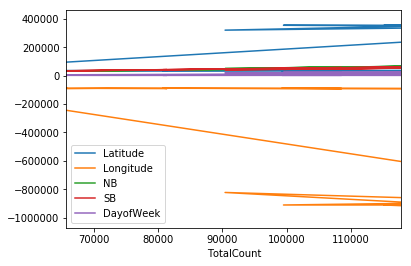

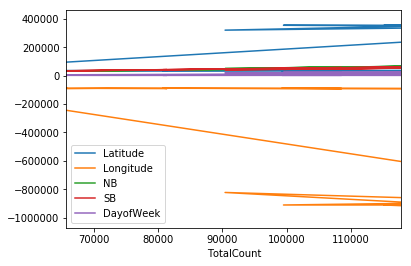

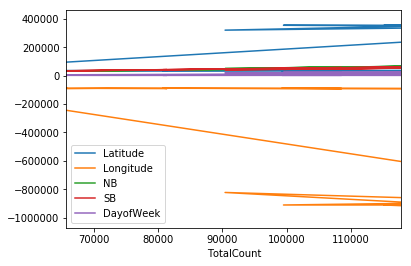

ValueError: ordinal must be >= 1